# Ejercicio 5

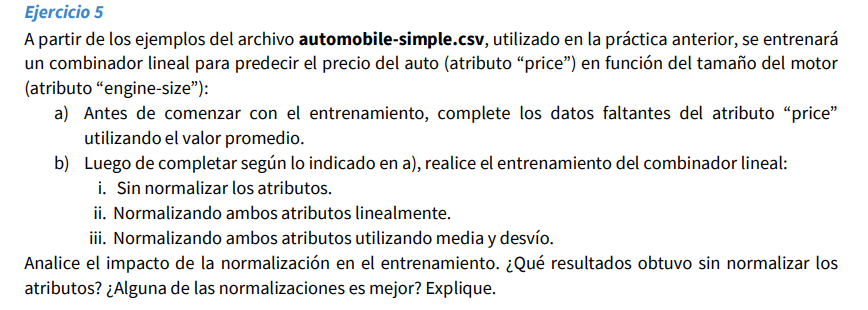

# Lectura de datos e importacion de librerias

In [52]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [53]:
import os
import pandas as pd
import numpy as np
import chardet
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from ClassNeuronaLineal import NeuronaLineal

nombre_archivo = DATOS_DIR + 'automobile-simple.csv'

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())

df= pd.read_csv(nombre_archivo, encoding=result['encoding'])

print(result['encoding'])
df

ascii


,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
0,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,13495.0,528019.904,33.297462
1,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,16500.0,528019.904,33.297462
2,alfa-romero,gas,two,hatchback,2823,152,154.0,19,26,16500.0,587592.640,30.898272
3,audi,gas,four,sedan,2337,109,102.0,24,30,13950.0,634816.956,42.697819
4,audi,gas,four,sedan,2824,136,115.0,18,22,17450.0,636734.832,27.997459
...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,four,sedan,2952,141,114.0,23,28,16845.0,721961.760,38.354298
201,volvo,gas,four,sedan,3049,141,160.0,19,25,19045.0,720913.920,32.043335
202,volvo,gas,four,sedan,3012,173,134.0,18,23,21485.0,721961.760,29.806494
203,volvo,diesel,four,sedan,3217,145,106.0,26,27,22470.0,721961.760,35.073342


# Inciso a - Nan

In [54]:
df.isnull().sum()

make            0
fuel-type       0
num-of-doors    2
body-style      0
curb-weight     0
engine-size     0
horsepower      2
city-mpg        0
highway-mpg     0
price           4
volume          0
eco-rating      0
dtype: int64

In [55]:
meanPrice = df['price'].mean()
meanPrice

13207.129353233831

In [56]:
df['price'] = df['price'].fillna(meanPrice)
df.isnull().sum()

make            0
fuel-type       0
num-of-doors    2
body-style      0
curb-weight     0
engine-size     0
horsepower      2
city-mpg        0
highway-mpg     0
price           0
volume          0
eco-rating      0
dtype: int64

Vemos que la columna price ya no tiene nulos

In [57]:
df = df.dropna()
df.isnull().sum()

make            0
fuel-type       0
num-of-doors    0
body-style      0
curb-weight     0
engine-size     0
horsepower      0
city-mpg        0
highway-mpg     0
price           0
volume          0
eco-rating      0
dtype: int64

# Inciso b - Entrenamiento del combinador lineal

In [58]:
# Imprime matriz de correclacion
corr = df[['engine-size', 'price']].corr()
print(corr)


             engine-size     price
engine-size     1.000000  0.863075
price           0.863075  1.000000


### I. sin normalizar los atributos

In [80]:
# seleccion de atributos
X = np.array(df['engine-size']).reshape((-1,1))
Y = np.array(df['price']).reshape((-1,1))

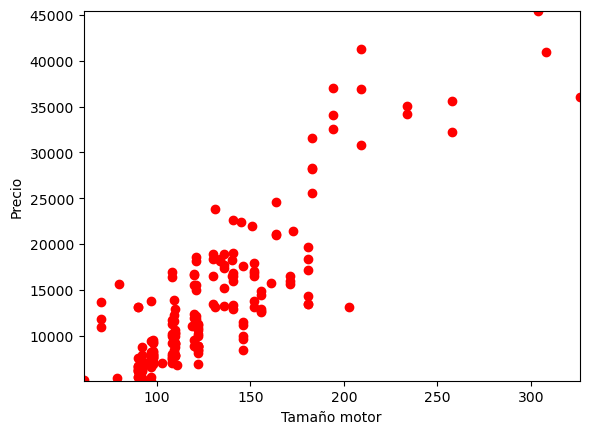

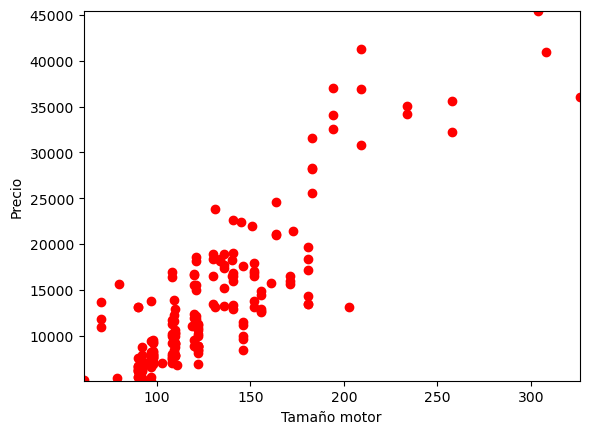

In [81]:
# entrena neurona lineal y grafica
modelo = NeuronaLineal(alpha=0.02, n_iter=500, cotaE=0.0001, draw=1, title=['Tamaño motor', 'Precio'])
modelo.fit(X, Y)

In [82]:
# imprime errores de cada iteracion:
print('Errores:')
for i, err in enumerate(modelo.errors_):
    print('%3d => %f' % (i, err[0]))

Errores:
  0 => nan


In [83]:

tamaño_motor = 130 #quiero predecir cual es el precio de un motor de 130
entrada = np.array([tamaño_motor]).reshape((-1,1)) #transformo la entrada
prediccion = modelo.predict( entrada )
print (f'El precio predicho para el motor de 130 es de {prediccion}')

El precio predicho para el motor de 130 es de [nan]


### II. Normalizando los atributos linealmente

In [63]:
# seleccion de atributos
X = np.array(df['engine-size']).reshape((-1,1))
Y = np.array(df['price']).reshape((-1,1))

In [64]:
data_scaler , targer_scaler= MinMaxScaler(), MinMaxScaler()
X = data_scaler.fit_transform(X)
Y = targer_scaler.fit_transform(Y)

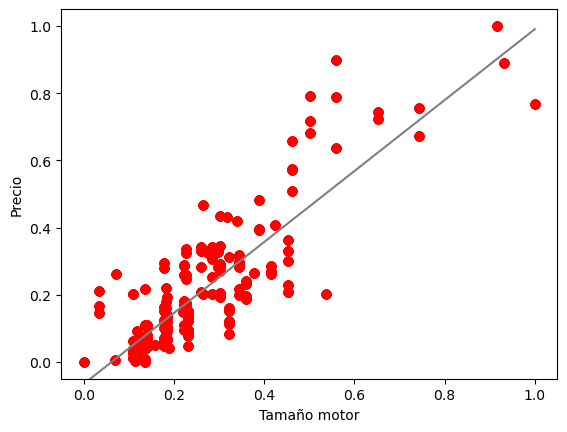

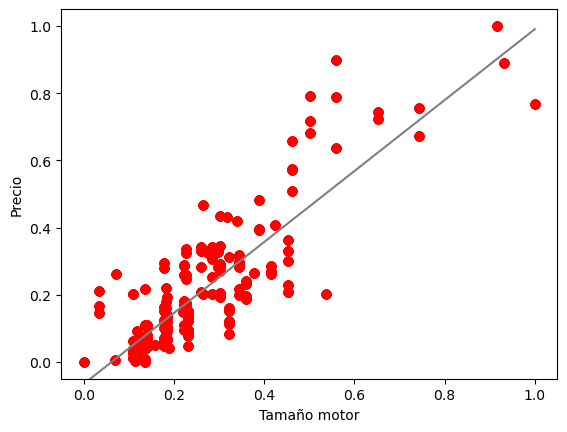

In [65]:
# entrena neurona lineal y grafica
modelo = NeuronaLineal(alpha=0.02, n_iter=500, cotaE=0.0001, draw=1, title=['Tamaño motor', 'Precio'])
modelo.fit(X, Y)


In [66]:
# imprime errores de cada iteracion:
print('Errores:')
for i, err in enumerate(modelo.errors_):
    print('%3d => %f' % (i, err[0]))

Errores:
  0 => 11.285501
  1 => 3.445108
  2 => 3.181770
  3 => 2.974559
  4 => 2.802872
  5 => 2.660497
  6 => 2.542412
  7 => 2.444461
  8 => 2.363198
  9 => 2.295770
 10 => 2.239812
 11 => 2.193363
 12 => 2.154799
 13 => 2.122775
 14 => 2.096175
 15 => 2.074074
 16 => 2.055706
 17 => 2.040434
 18 => 2.027734
 19 => 2.017166
 20 => 2.008371
 21 => 2.001046
 22 => 1.994944
 23 => 1.989857
 24 => 1.985614
 25 => 1.982073
 26 => 1.979115
 27 => 1.976642
 28 => 1.974574
 29 => 1.972843
 30 => 1.971392
 31 => 1.970175
 32 => 1.969153
 33 => 1.968293
 34 => 1.967570
 35 => 1.966960
 36 => 1.966446
 37 => 1.966011
 38 => 1.965643
 39 => 1.965330
 40 => 1.965065
 41 => 1.964840
 42 => 1.964647
 43 => 1.964483
 44 => 1.964343
 45 => 1.964222
 46 => 1.964118
 47 => 1.964029


In [67]:
tamaño_motor = 130 #quiero predecir cual es el precio de un motor de 130
entrada = np.array([tamaño_motor]).reshape((-1,1)) #transformo la entrada
entrada = data_scaler.transform(entrada) #revierto la normalizacion
prediccion = modelo.predict( entrada )
prediccion = targer_scaler.inverse_transform([prediccion])
print (f'El precio predicho para el motor de 130 es de {prediccion}')

El precio predicho para el motor de 130 es de [[13569.28974623]]


### III. Normalizando los atributos con media y desvio

In [74]:
# seleccion de atributos
X = np.array(df['engine-size']).reshape((-1,1))
Y = np.array(df['price']).reshape((-1,1))

In [75]:
data_scaler, targer_scaler = StandardScaler(), StandardScaler()
X = data_scaler.fit_transform(X)
Y = targer_scaler.fit_transform(Y)

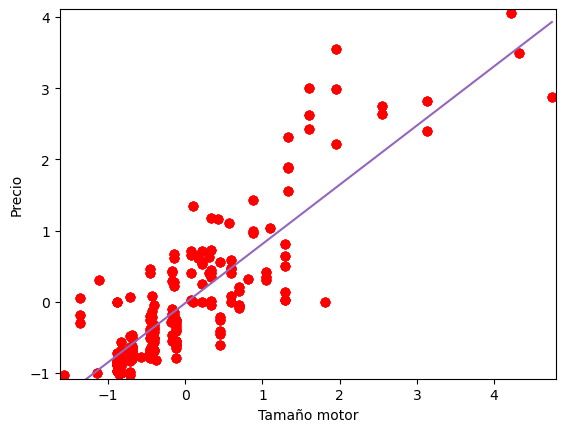

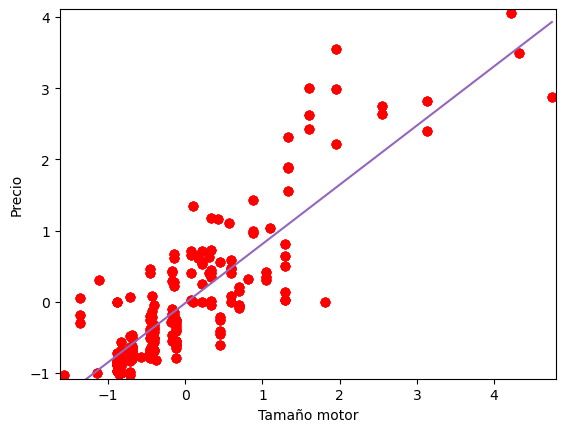

In [76]:
# entrena neurona lineal y grafica
modelo = NeuronaLineal(alpha=0.02, n_iter=500, cotaE=0.0001, draw=1, title=['Tamaño motor', 'Precio'])
modelo.fit(X, Y)

In [77]:
# imprime errores de cada iteracion:
print('Errores:')
for i, err in enumerate(modelo.errors_):
    print('%3d => %f' % (i, err[0]))

Errores:
  0 => 69.509790
  1 => 53.188820
  2 => 53.127084
  3 => 53.126300
  4 => 53.126289


In [78]:
tamaño_motor = 130

entrada = np.array([tamaño_motor]).reshape((-1,1))
entrada = data_scaler.transform(entrada)

prediccion = modelo.predict( entrada )
prediccion = targer_scaler.inverse_transform([prediccion])
print (f'El precio predicho para el motor de 130 es de {prediccion}')

El precio predicho para el motor de 130 es de [[13594.90425151]]


# Analisis final

In [79]:
promedio130 = df[ df['engine-size'] == 130 ] ['price'].mean()
print (f'El precio promedio para motor de 130 es de {promedio130}')
max130 = df[ df['engine-size'] == 130 ] ['price'].max()
print (f'El precio maximo para motor de 130 es de {max130}')
min130 = df[ df['engine-size'] == 130 ] ['price'].min()
print (f'El precio minimo para motor de 130 es de {min130}')

El precio promedio para motor de 130 es de 16841.25
El precio maximo para motor de 130 es de 18950.0
El precio minimo para motor de 130 es de 13495.0


1. sin normalizar no anda
2. normalizando linealmente da un precio de 13569.2897
3. normalizando con media y desvio da un precio de 13594.9042

La normalizacion de media y desvio se acerca un poco mas al precio promedio pero igualmente los resultados son bastante parecidos con respecto a la normalizacion lineal